# Load Dataset and Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from tensorflow import keras

# Dataset path
dataset = '/content/drive/MyDrive/ColabNotebooks/Main_Dataset'

img_height,img_width = 80,80
batch_size = 128

# Load dataset and split train and test [80-20]
train, test = keras.utils.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
)

Found 1500 files belonging to 3 classes.
Using 1200 files for training.
Using 300 files for validation.


In [4]:
# Class names
class_names = train.class_names
print(class_names)

['Adenocarcinoma', 'Benign_Tissue', 'Squamous_Cell_Carcinoma']


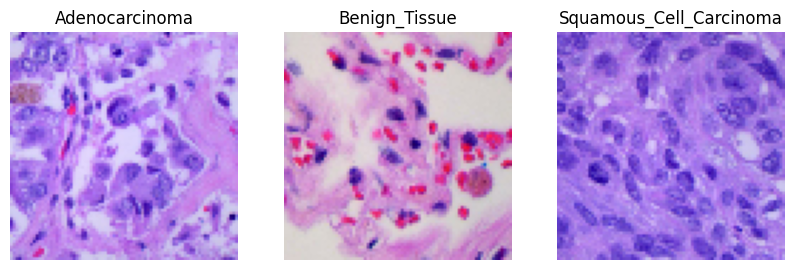

In [ ]:
import matplotlib.pyplot as plt

# Plot sample images
plt.figure(figsize=(10, 4))
for i, class_name in enumerate(class_names):
    for images, labels in train:
        for image, label in zip(images, labels):
            if class_names[label] == class_name:
                plt.subplot(1, len(class_names), i + 1)
                plt.imshow(image.numpy().astype("uint8"))
                plt.title(class_name)
                plt.axis("off")
                break
        break
plt.show()

# CNN Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 80, 80, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        1

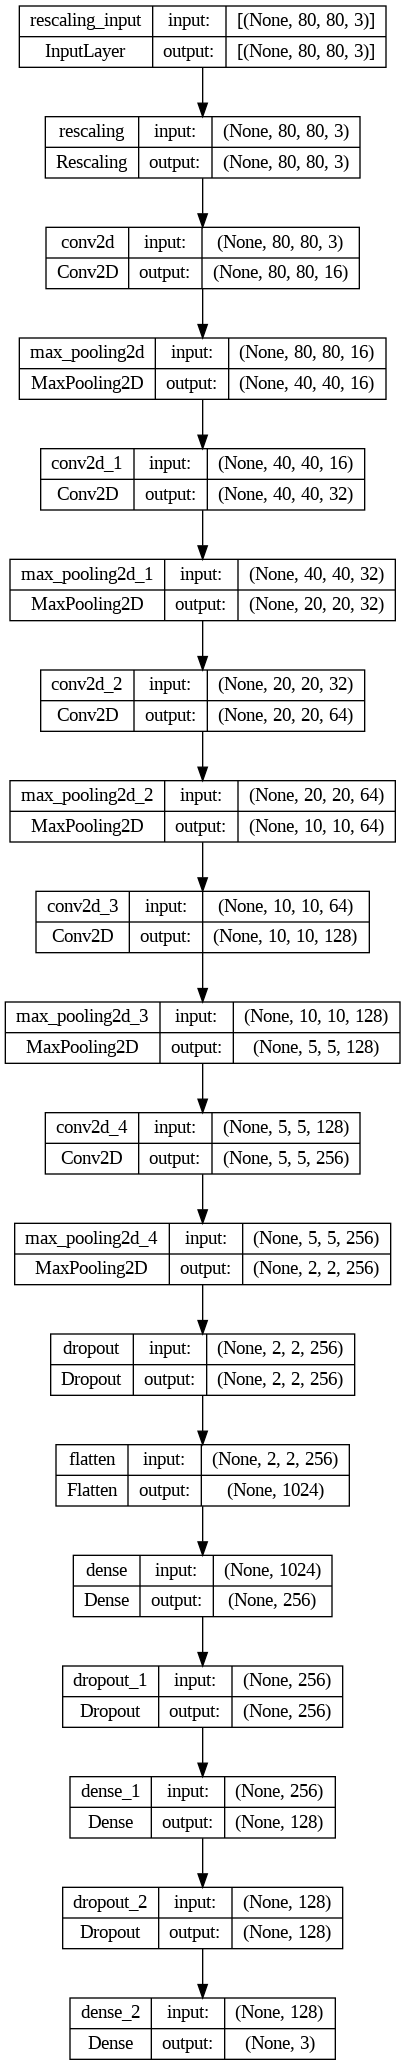

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers.experimental.preprocessing import Rescaling
from keras.regularizers import l2

num_classes = 3

# Rescaling
rescale = Rescaling(1./255, input_shape=(img_height, img_width, 3))

# Model
model = Sequential([
  rescale,

  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(), # Downsamples the input

  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(256,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),

  layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)),
  layers.Dropout(0.2),

  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),

  layers.Dense(num_classes, activation='softmax') #softmax for multiclass classification
])

model.summary()
plot_model(model, to_file='CNNmodel5.png', show_shapes=True, show_layer_names=True)

# Training the Model

In [ ]:
# Compile and Train the Model
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)

history = model.fit(train, validation_data=test, epochs=30, verbose=1)

Epoch 1/30
10/10 [==============================] - 63s 6s/step - loss: 0.9943 - accuracy: 0.5050 - val_loss: 0.5862 - val_accuracy: 0.6733
Epoch 2/30
10/10 [==============================] - 5s 146ms/step - loss: 0.7433 - accuracy: 0.6483 - val_loss: 0.9515 - val_accuracy: 0.5900
Epoch 3/30
10/10 [==============================] - 7s 186ms/step - loss: 0.7870 - accuracy: 0.5917 - val_loss: 0.7500 - val_accuracy: 0.6467
Epoch 4/30
10/10 [==============================] - 5s 187ms/step - loss: 0.6629 - accuracy: 0.6475 - val_loss: 0.5560 - val_accuracy: 0.6833
Epoch 5/30
10/10 [==============================] - 5s 188ms/step - loss: 0.5973 - accuracy: 0.6533 - val_loss: 0.5752 - val_accuracy: 0.6633
Epoch 6/30
10/10 [==============================] - 6s 331ms/step - loss: 0.5898 - accuracy: 0.6808 - val_loss: 0.5392 - val_accuracy: 0.6800
Epoch 7/30
10/10 [==============================] - 5s 156ms/step - loss: 0.5762 - accuracy: 0.6625 - val_loss: 0.5397 - val_accuracy: 0.7100
Epoch 8/

In [ ]:
# Save model
model.save('/content/drive/MyDrive/ColabNotebooks/CNN_with_DCGAN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing the model

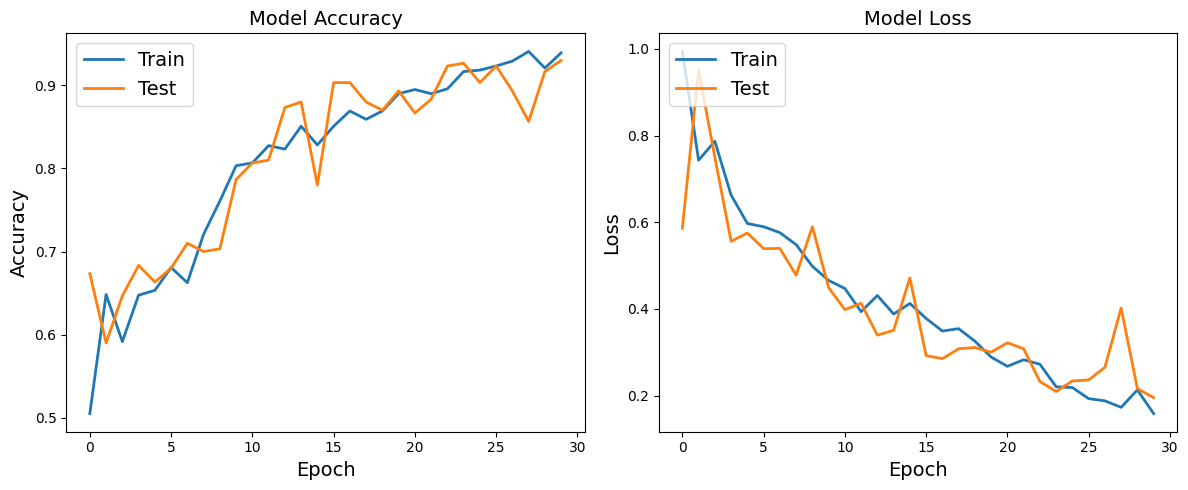

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

font_size = 14

# Accuracy
axs[0].plot(history.history['accuracy'], linewidth=2)
axs[0].plot(history.history['val_accuracy'], linewidth=2)
axs[0].set_title('Model Accuracy', fontsize=font_size)
axs[0].set_ylabel('Accuracy', fontsize=font_size)
axs[0].set_xlabel('Epoch', fontsize=font_size)
axs[0].legend(['Train', 'Test'], loc='upper left', fontsize=font_size)

# Loss
axs[1].plot(history.history['loss'], linewidth=2)
axs[1].plot(history.history['val_loss'], linewidth=2)
axs[1].set_title('Model Loss', fontsize=font_size)
axs[1].set_ylabel('Loss', fontsize=font_size)
axs[1].set_xlabel('Epoch', fontsize=font_size)
axs[1].legend(['Train', 'Test'], loc='upper left', fontsize=font_size)

plt.tight_layout()

plt.savefig('loss.jpg', dpi=300)

plt.show()

3/3 [==============================] - 61s 9s/step


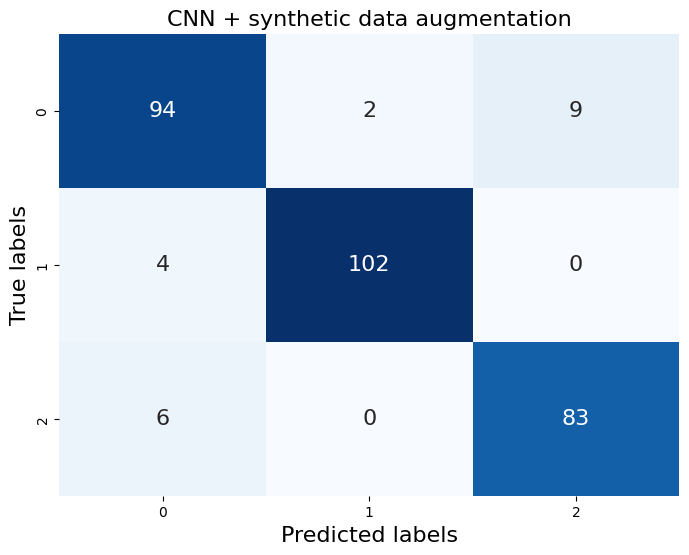

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

font_size = 16

# Make predictions on test
y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = np.concatenate([y for x, y in test], axis=0)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": font_size})
plt.title('CNN + synthetic data augmentation',fontsize=font_size)
plt.xlabel('Predicted labels', fontsize=font_size)
plt.ylabel('True labels', fontsize=font_size)
plt.savefig('cmatrix.jpg', dpi=300)
plt.show()

In [5]:
from keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/ColabNotebooks/CNN_with_DCGAN.h5')

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

evaluation = model.evaluate(test)

loss = evaluation[0]
accuracy = evaluation[1]

y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.concatenate([y for x, y in test], axis=0)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, y_pred_classes)
precision = precision_score(true_labels, y_pred_classes, average='weighted')
recall = recall_score(true_labels, y_pred_classes, average='weighted')
f1 = f1_score(true_labels, y_pred_classes, average='weighted')

print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}')

3/3 [==============================] - 1s 268ms/step
Loss: 0.1954270750284195, Accuracy: 0.93, Precision: 0.9305295429208471, Recall: 0.93, F1-score: 0.9301516624308132


2/2 [==============================] - 1s 282ms/step


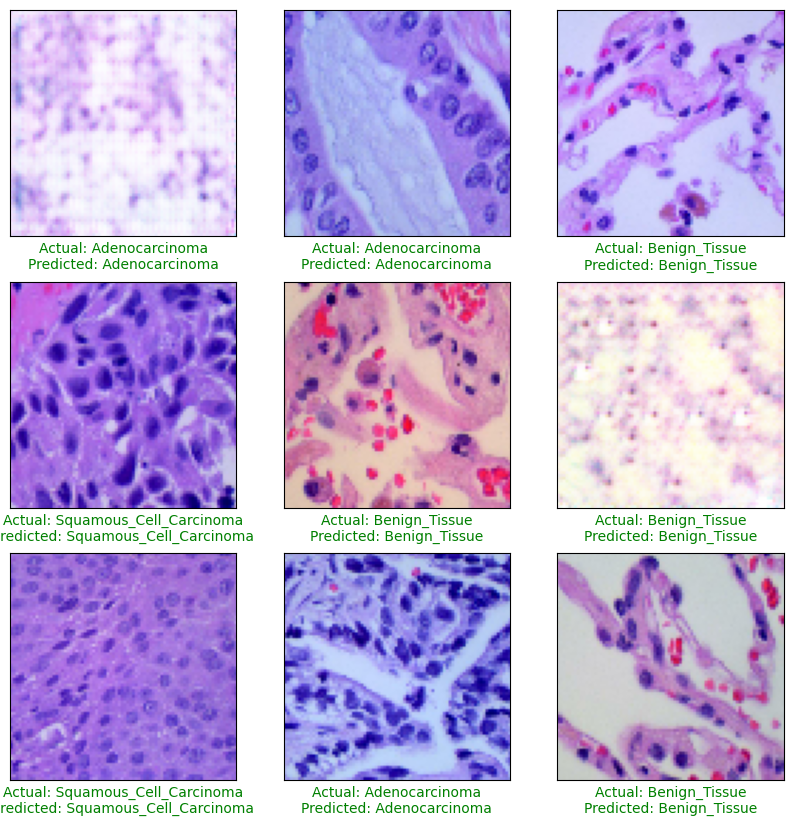

In [ ]:
import tensorflow as tf

# Actual vs Predicted
def predictions(model, dataset, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset):
        predictions = model.predict(images)
        for j in range(len(images)):
            if i * 3 + j >= num_images:
                break
            plt.subplot(3, 3, i * 3 + j + 1)  # 3x3 grid
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[j].numpy().astype("uint8"))
            actual_label = class_names[labels[j].numpy()]  # actual label
            predicted_label = class_names[predictions[j].argmax()]  # predicted label
            if actual_label == predicted_label:
                color = 'green'  # correct
            else:
                color = 'red'  # wrong
            plt.xlabel(f'Actual: {actual_label}\nPredicted: {predicted_label}', color=color)
    plt.show()

# Visualize predictions on the test set
predictions(model, test, class_names)